In [1]:
import BondGraphTools as bgt

In [2]:
model=bgt.new(name='branching vessel')

In [3]:
Se=bgt.new("Se",value=9.331*1e6)
Sf1=bgt.new("Sf",value=7.998*1e6)
Sf2=bgt.new("Sf",value=7.998*1e6)

C=bgt.new("C", value=0.60015*1e-6)
C1=bgt.new("C", value=0.125281*1e-6)
C2=bgt.new("C", value=0.1125281*1e-6)

R=bgt.new("R", value=1.333*1e6)
R1=bgt.new("R", value=10.564*1e6)
R2=bgt.new("R", value=10.664*1e6)

L=bgt.new("I", value=0.123*1e6)
L1=bgt.new("I", value=0.08665*1e6)
L2=bgt.new("I", value=0.06665*1e6)

In [4]:
zero_junc_1=bgt.new("0")
zero_junc_2=bgt.new("0")
zero_junc_3=bgt.new("0")

one_junc_1=bgt.new("1")
one_junc_2=bgt.new("1")
one_junc_3=bgt.new("1")

In [5]:
bgt.add(model,Se,Sf1,Sf2,C,C1,C2,R,R1,R2,L,L1,L2,zero_junc_1,zero_junc_2,zero_junc_3,one_junc_1,one_junc_2,one_junc_3)

In [6]:
bgt.connect(Se,one_junc_1)
bgt.connect(one_junc_1,R)
bgt.connect(one_junc_1,L)
bgt.connect(one_junc_1,zero_junc_1)
bgt.connect(zero_junc_1,C)
bgt.connect(zero_junc_1,one_junc_2)
bgt.connect(zero_junc_1,one_junc_3)
bgt.connect(one_junc_2,R1)
bgt.connect(one_junc_2,L1)
bgt.connect(one_junc_2,zero_junc_2)
bgt.connect(zero_junc_2,C1)
bgt.connect(zero_junc_2,Sf1)
bgt.connect(one_junc_3,L2)
bgt.connect(one_junc_3,R2)
bgt.connect(one_junc_3,zero_junc_3)
bgt.connect(zero_junc_3,C2)
bgt.connect(zero_junc_3,Sf2)

In [7]:
bgt.draw(model)

In [8]:
timespan=[0,12.5]

In [9]:
model.state_vars

{'x_0': (C: C4, 'q_0'),
 'x_1': (C: C5, 'q_0'),
 'x_2': (C: C6, 'q_0'),
 'x_3': (I: I10, 'p_0'),
 'x_4': (I: I11, 'p_0'),
 'x_5': (I: I12, 'p_0')}

In [10]:
x0={"x_0":10*1e-6, "x_1":4*1e-6, "x_2":4*1e-6, "x_3":0, "x_4":0, "x_5":0}

In [11]:
model.constitutive_relations

[dx_0 - 813008130081301*x_3/100000000000000000000 + 115406809001731*x_4/10000000000000000000 + 2344336084021*x_5/156250000000000000,
 dx_1 - 115406809001731*x_4/10000000000000000000 - 7998000,
 dx_2 - 2344336084021*x_5/156250000000000000 - 7998000,
 dx_3 + 166625010414063*x_0/100000000 + 108373983739837*x_3/10000000000000 - 9331000,
 dx_4 - 166625010414063*x_0/100000000 + 798205633735363*x_1/100000000 + 121915753029429*x_4/1000000000000,
 dx_5 - 166625010414063*x_0/100000000 + 888666919640517*x_2/100000000 + 160*x_5]

In [12]:
t, x = bgt.simulate(model, timespan=timespan, x0=x0)


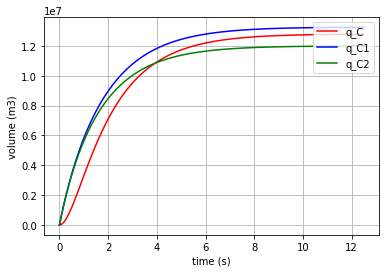

In [13]:
# plotting state variables (q_C, q_C1 & q_C2) in 3 C-elements (C, C1 & C2)
import matplotlib.pyplot as plt
for q, c, label in [(x[:,0],'r', 'q_C'), (x[:,1],'b', 'q_C1'), (x[:,2],'g', 'q_C2')]:
    fig=plt.plot(t,q,c, label=label)
    plt.xlabel("time (s)")
    plt.ylabel("volume (m3)") #metre3
    plt.legend(loc='upper right')
    plt.grid()

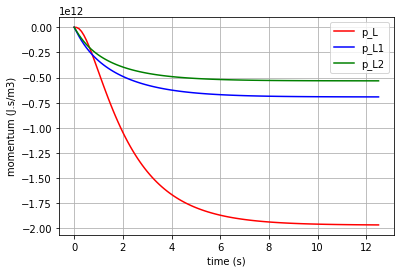

In [14]:
# plotting state variables (p_L, p_L1 & p_L2) in 3 I-elements (L, L1 & L2)
import matplotlib.pyplot as plt
for l, c, label in [(x[:,3],'r', 'p_L'), (x[:,4],'b', 'p_L1'), (x[:,5],'g', 'p_L2')]:
    fig=plt.plot(t,l,c, label=label)
    plt.xlabel("time (s)")
    plt.ylabel("momentum (J.s/m3)")
    plt.legend(loc='upper right')
    plt.grid()

In [15]:
# Calculating the flow & potential in C
#  dq_C/dt = v_C (flow)
# u_C=1/C*(q_C)

import numpy as np
f = np.array(x[:,0], dtype=float)
slope=np.gradient(f,0.1)
v_C=slope

u_C=(1/C._params['C'])*x[:,0]



In [16]:
# Calculating the flow & potential in C1
#  dq_C1/dt = v_C1 (flow)
# u_C1=1/C*(q_C1)

import numpy as np
f = np.array(x[:,1], dtype=float)
slope=np.gradient(f,0.1)
v_C1=slope

u_C1=(1/C1._params['C'])*x[:,1]


In [17]:
# Calculating the flow & potential in C2
#  dq_C2/dt = v_C2 (flow)
# u_C2=1/C*(q_C2)

import numpy as np
f = np.array(x[:,2], dtype=float)
slope=np.gradient(f,0.1)
v_C2=slope

u_C2=(1/C2._params['C'])*x[:,2]


In [18]:
# Calculating the flow & potential in L
# v_L=x[:,3]/L
# u_L=L1.(v_L)'
v_L=x[:,3]/L._params['L']
import numpy as np
f = np.array(v_L, dtype=float)
slope=np.gradient(f,0.1)
dv_L=slope
u_L=L._params['L']*dv_L


In [19]:
# Calculating the flow & potential in L1
# v_L1=x[:,4]/L1
# u_L1=L1.(v_L1)'
v_L1=x[:,4]/L1._params['L']
import numpy as np
f = np.array(v_L1, dtype=float)
slope=np.gradient(f,0.1)
dv_L1=slope
u_L1=L1._params['L']*dv_L1


In [20]:
# Calculating the flow & potential in L2
# v_L2=x[:,5]/L2
# u_L2=L2.(v_L2)'
v_L2=x[:,5]/L2._params['L']
import numpy as np
f = np.array(v_L2, dtype=float)
slope=np.gradient(f,0.1)
dv_L2=slope
u_L2=L2._params['L']*dv_L2


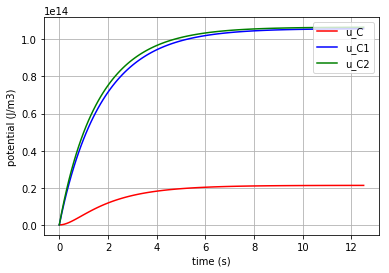

In [21]:
# plotting the potentials in the three C-elements
for u, c, label in [(u_C,'r', 'u_C'), (u_C1,'b', 'u_C1'), (u_C2,'g', 'u_C2')]:
    fig=plt.plot(t,u,c,label=label)
    plt.xlabel("time (s)")
    plt.ylabel("potential (J/m3)")
    plt.legend(loc='upper right')
    plt.grid()


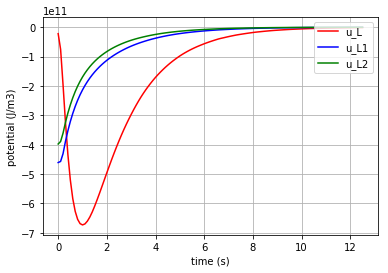

In [22]:
# plotting the potentials in the three I-elements
for u, c, label in [(u_L,'r','u_L'), (u_L1,'b','u_L1'), (u_L2,'g','u_L2')]:
    fig=plt.plot(t,u,c,label=label)
    plt.xlabel("time (s)")
    plt.ylabel("potential (J/m3)")
    plt.legend(loc='upper right')
    plt.grid()

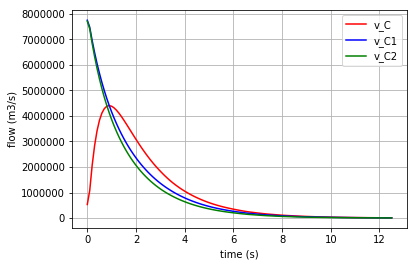

In [23]:
# plotting the flows in the three C-elements
for v, c, label in [(v_C,'r','v_C'), (v_C1,'b','v_C1'), (v_C2,'g','v_C2')]:
    fig=plt.plot(t,v,c, label=label)
    plt.xlabel("time (s)")
    plt.ylabel("flow (m3/s)")
    plt.legend(loc='upper right')
    plt.grid()

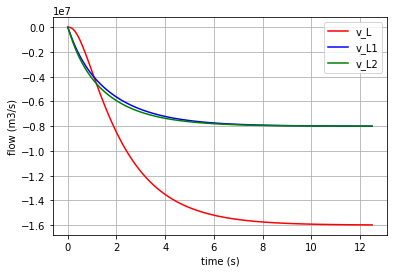

In [24]:
# plotting the flows in the three I-elements
for v, c, label in [(v_L,'r','v_L'), (v_L1,'b','v_L1'), (v_L2,'g','v_L2')]:
    fig=plt.plot(t,v,c,label=label)
    plt.xlabel("time (s)")
    plt.ylabel("flow (m3/s)")
    plt.legend(loc='upper right')
    plt.grid()